In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tmp = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")
table = tmp[0]
print(table.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [3]:
shape = table.shape
print(f"Кількість рядків: {shape[0]}")
print(f"Кількість стовпців: {shape[1]}")

Кількість рядків: 28
Кількість стовпців: 9


In [4]:
table.replace("—", pd.NA, inplace=True)
print(table)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  <NA>  <NA>
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2  <NA>
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1  <NA>
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

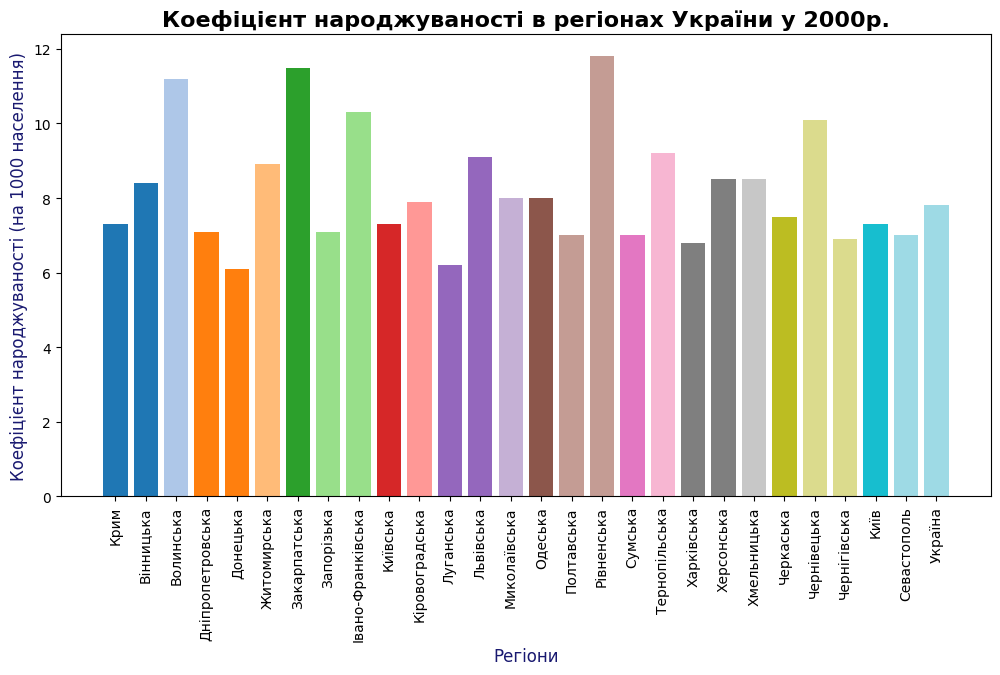

In [5]:
plt.figure(figsize=(12, 6))
num_bars = len(table["Регіон"])
colors = plt.cm.tab20(np.linspace(0, 1, num_bars))
plt.bar(
    table["Регіон"],
    table["2000"],
    color=colors,
)
plt.xlabel("Регіони", fontsize=12, color="midnightblue")
plt.ylabel("Коефіцієнт народжуваності (на 1000 населення)", fontsize=12, color="midnightblue")
plt.title("Коефіцієнт народжуваності в регіонах України у 2000р.", fontsize=16, fontweight=800)
plt.xticks(rotation=90)
plt.show()

In [6]:
column_types = table.dtypes
print(f'Типи стовпців:\n,{column_types}')

Типи стовпців:
,Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [7]:
numeric_cols = table.columns.difference(['Регіон'])  # Виключаємо колонку 'Регіон'
table[numeric_cols] = table[numeric_cols].apply(pd.to_numeric, errors='coerce')
print(table)
column_types = table.dtypes
print(f'Типи стовпців:\n,{column_types}')

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [8]:
missing_values = table.isnull().sum()
total_values = table.shape[0]
missing_percentage = (missing_values / total_values) * 100
formatted_percentage = missing_percentage.round(2).astype(str) + "%"
print(f'Частка пропусків у кожній колонці:\n{formatted_percentage[1:]}')

Частка пропусків у кожній колонці:
1950     7.14%
1960     3.57%
1970     3.57%
1990      0.0%
2000      0.0%
2012      0.0%
2014     7.14%
2019    14.29%
dtype: object


In [9]:
table = table.iloc[:-1]
print(f'Видалено останній рядок:\n{table}')

Видалено останній рядок:
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9  

In [10]:
table = table.fillna(table.mean().round(1))
print('Відсутні дані замінені на середні значення цих стовпців:')
print(table)

Відсутні дані замінені на середні значення цих стовпців:
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0

<ipython-input-10-cb4dab220377>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  table = table.fillna(table.mean().round(1))


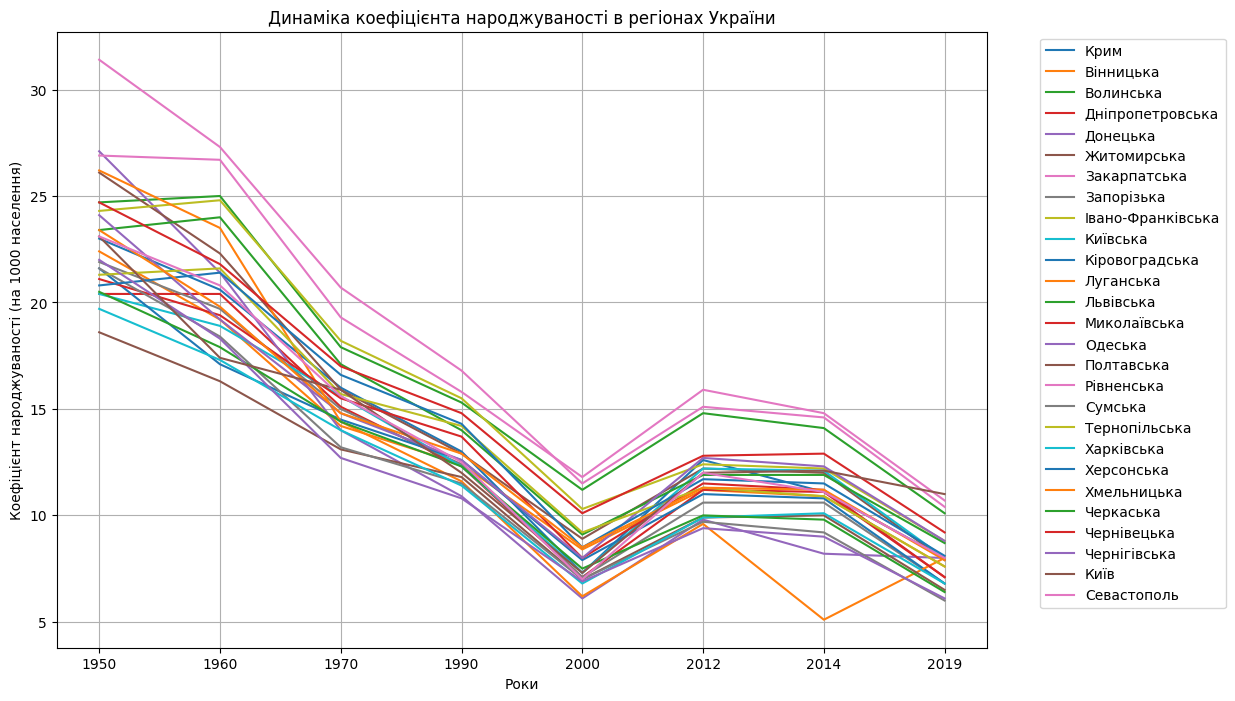

In [11]:
years = table.columns[1:]
regions = table['Регіон']
plt.figure(figsize=(12, 8))
for region in regions:
    plt.plot(years, table[table['Регіон'] == region].iloc[:, 1:].values.flatten(), label=region)

# Налаштування графіка
plt.title('Динаміка коефіцієнта народжуваності в регіонах України')
plt.xlabel('Роки')
plt.ylabel('Коефіцієнт народжуваності (на 1000 населення)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [12]:
average_birth_rate_2019 = table['2019'].mean()
regions_above_average = table[table['2019'] > average_birth_rate_2019]['Регіон']
print("Регіони, де рівень народжуваності у 2019 році був вищим за середній по Україні:")
print(regions_above_average.tolist())


Регіони, де рівень народжуваності у 2019 році був вищим за середній по Україні:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


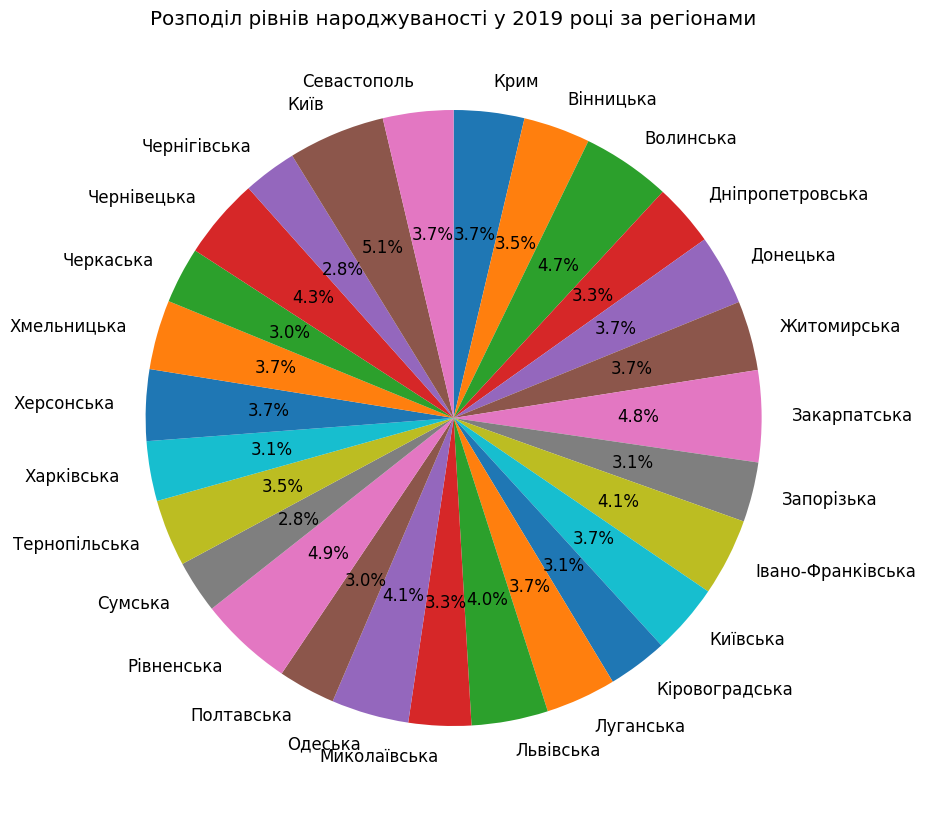

In [13]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
birth_rates = table['2019']
percentage_birth_rates = (birth_rates / birth_rates.sum()) * 100
plt.pie(percentage_birth_rates, labels=table['Регіон'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Розподіл рівнів народжуваності у 2019 році за регіонами')
plt.show()

In [14]:
region_max_2014 = table[table['2014'] == table['2014'].max()]['Регіон']
print(f"Регіон з найбільшою народжуваністю у 2014 році: {region_max_2014}")

Регіон з найбільшою народжуваністю у 2014 році: 16    Рівненська
Name: Регіон, dtype: object


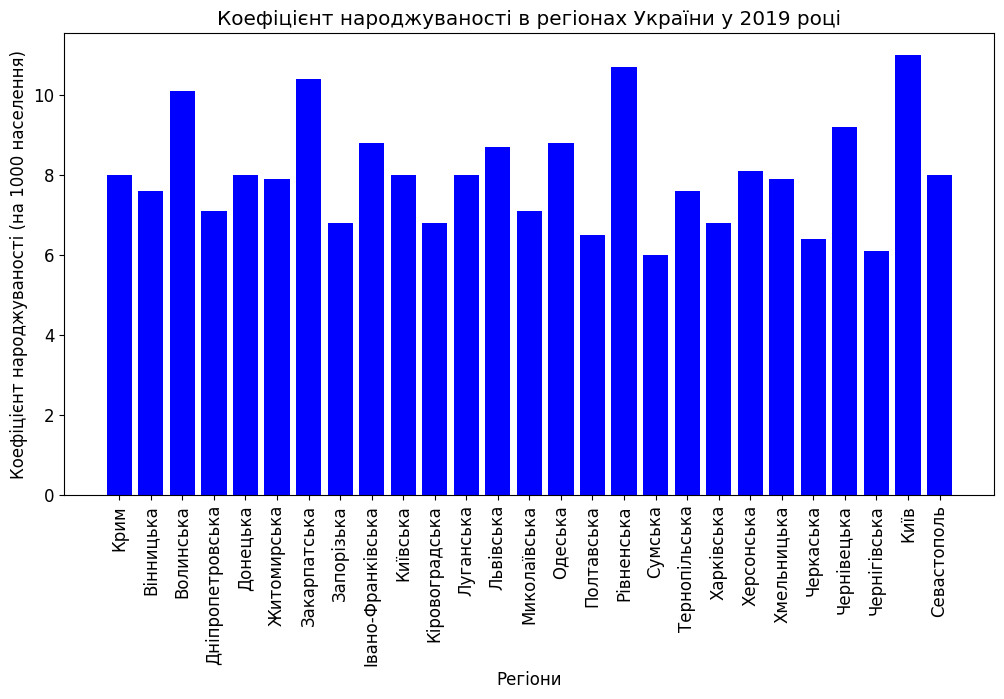

In [15]:
regions = table['Регіон']
birth_rates_2019 = table['2019']

plt.figure(figsize=(12, 6))
plt.bar(regions, birth_rates_2019, color='blue')
plt.title('Коефіцієнт народжуваності в регіонах України у 2019 році')
plt.xlabel('Регіони')
plt.ylabel('Коефіцієнт народжуваності (на 1000 населення)')
plt.xticks(rotation=90)
plt.show()
